In [51]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/45_0_0_20170117180013541.jpg.chip.jpg
/kaggle/input/utkface-new/UTKFace/26_1_1_20170117153641469.jpg.c

import necceseray modules

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D
print("Imported")


Imported


Loading the dataset

In [53]:
BASE_DIR = '/kaggle/input/utkface-new/UTKFace'

In [54]:
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp= filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [55]:
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

image  age  gender
0  /kaggle/input/utkface-new/UTKFace/26_0_2_20170...   26       0
1  /kaggle/input/utkface-new/UTKFace/22_1_1_20170...   22       1
2  /kaggle/input/utkface-new/UTKFace/21_1_3_20170...   21       1
3  /kaggle/input/utkface-new/UTKFace/28_0_0_20170...   28       0
4  /kaggle/input/utkface-new/UTKFace/17_1_4_20170...   17       1

In [56]:
gender_dict = {0:'Male',1:'Female'}

Exploratory Data Analysis

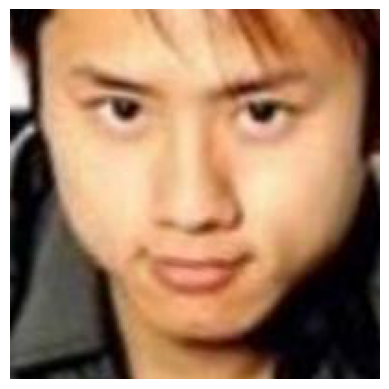

In [57]:
from PIL import Image
img= Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

<AxesSubplot:xlabel='age', ylabel='Density'>

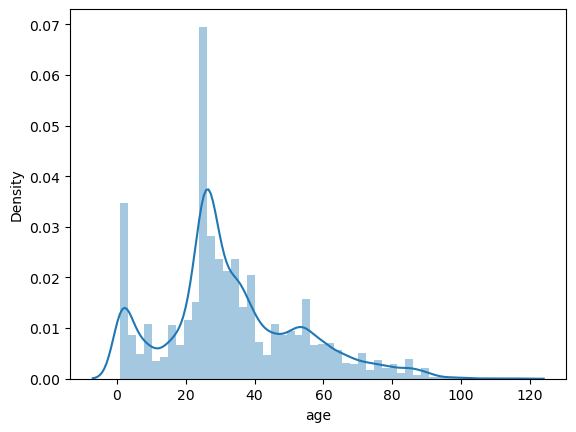

In [58]:
sns.distplot(df['age'])

<AxesSubplot:ylabel='count'>

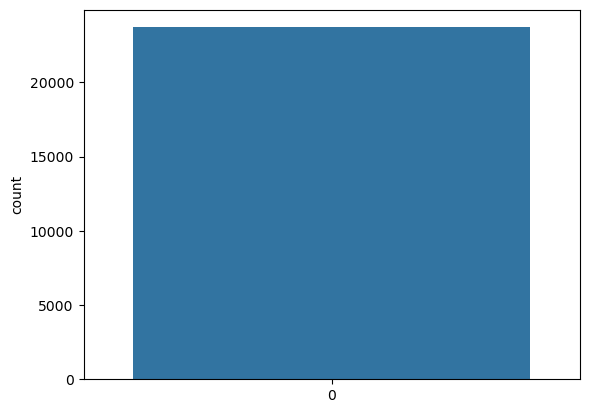

In [59]:
sns.countplot(df['gender'])

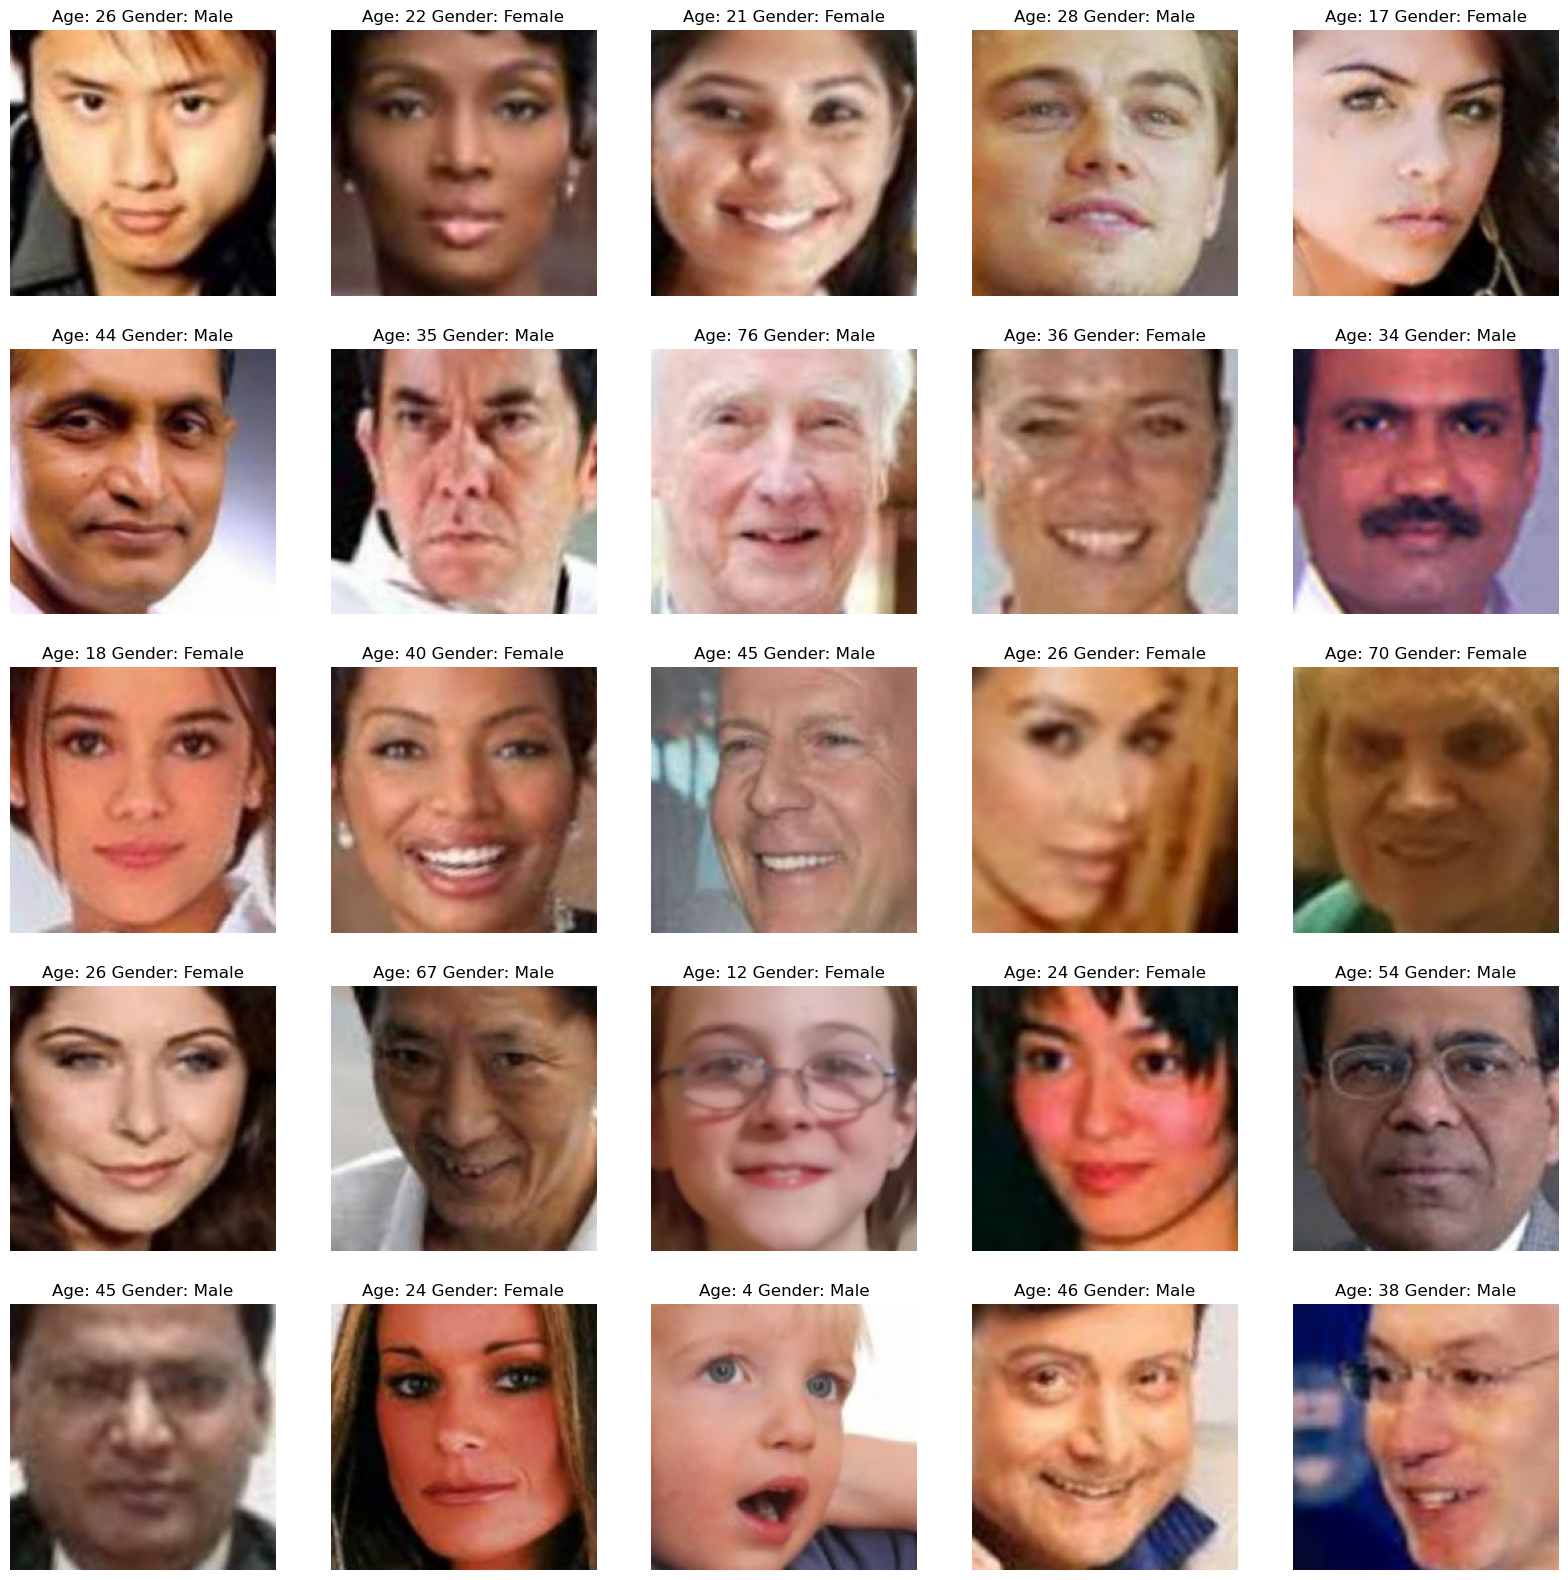

In [60]:
plt.figure(figsize=(20,20))
files = df.iloc[0:25]

for index,file,age,gender in files.itertuples():
    plt.subplot(5,5,index+1)
    img=load_img(file)
    img=np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

Feature Extraction

In [61]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale = True)
        img = img.resize((128,128), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    features =features.reshape(len(features), 128, 128, 1)
    return features

In [62]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [63]:
X.shape

(23708, 128, 128, 1)

In [64]:
X = X/255.0

In [65]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [66]:
input_shape = (128,128,1)

In [67]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3,3), activation='relu')(inputs)
maxp_1 = MaxPooling2D(pool_size = (2,2))(conv_1)
conv_2 = Conv2D(64,  kernel_size=(3,3), activation='relu')(maxp_1)
maxp_2 = MaxPooling2D(pool_size = (2,2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3,3), activation='relu')(maxp_2)
maxp_3 = MaxPooling2D(pool_size = (2,2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3,3), activation='relu')(maxp_3)
maxp_4 = MaxPooling2D(pool_size = (2,2))(conv_4)

flatten=Flatten()(maxp_4)


dense_1  = Dense(256,activation = 'relu') (flatten)
dense_2  = Dense(256,activation = 'relu') (flatten)


dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

output_1 = Dense(1, activation ='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation ='relu', name='age_out')(dropout_2)

model = Model(inputs = [inputs], outputs = [output_1, output_2])

model.compile(loss=['binary_crossentropy','mae'], optimizer = 'adam', metrics =['accuracy'])


In [68]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_8 (Conv2D)              (None, 126, 126, 32  320         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d_8 (MaxPooling2D)  (None, 63, 63, 32)  0           ['conv2d_8[0][0]']               
                                                                                            

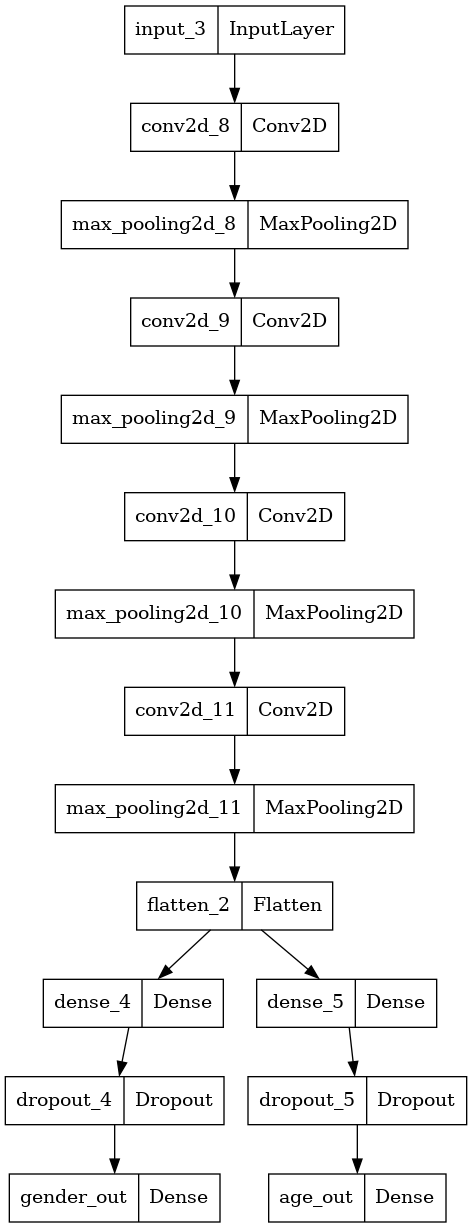

In [69]:
from tensorflow.keras.utils import  plot_model
plot_model(model)

In [70]:
history = model.fit(x=X, y=[y_gender,y_age], batch_size=32, epochs=30, validation_split = 0.1)

Epoch 1/30
667/667 [==============================] - 12s 15ms/step - loss: 14.9401 - gender_out_loss: 0.6323 - age_out_loss: 14.3078 - gender_out_accuracy: 0.6228 - age_out_accuracy: 0.0446 - val_loss: 11.5127 - val_gender_out_loss: 0.4932 - val_age_out_loss: 11.0195 - val_gender_out_accuracy: 0.7554 - val_age_out_accuracy: 0.0211
Epoch 2/30
667/667 [==============================] - 9s 14ms/step - loss: 10.8873 - gender_out_loss: 0.4551 - age_out_loss: 10.4321 - gender_out_accuracy: 0.7851 - age_out_accuracy: 0.0236 - val_loss: 9.8154 - val_gender_out_loss: 0.3960 - val_age_out_loss: 9.4194 - val_gender_out_accuracy: 0.8237 - val_age_out_accuracy: 0.0143
Epoch 3/30
667/667 [==============================] - 9s 14ms/step - loss: 9.3025 - gender_out_loss: 0.3908 - age_out_loss: 8.9118 - gender_out_accuracy: 0.8170 - age_out_accuracy: 0.0157 - val_loss: 9.5960 - val_gender_out_loss: 0.3499 - val_age_out_loss: 9.2461 - val_gender_out_accuracy: 0.8511 - val_age_out_accuracy: 0.0063
Epoch 

## Plot the results

<Figure size 640x480 with 0 Axes>

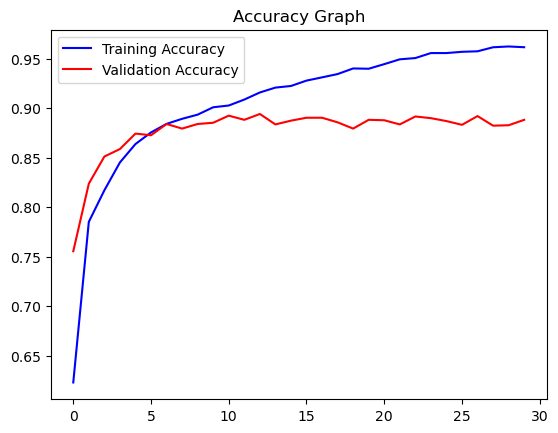

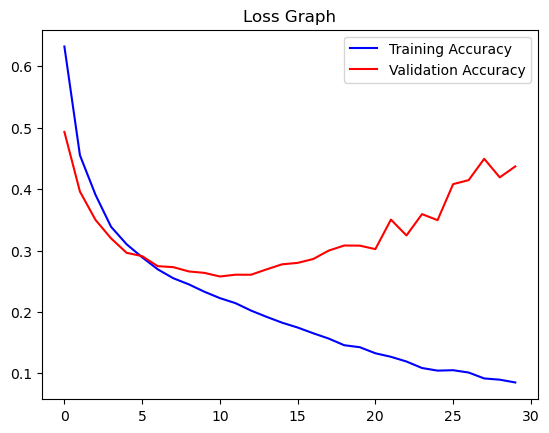

<Figure size 640x480 with 0 Axes>

In [71]:
acc = history.history['gender_out_accuracy']
val_acc = history.history['val_gender_out_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['gender_out_loss']
val_loss = history.history['val_gender_out_loss']

plt.plot(epochs, loss, 'b', label='Training Accuracy')
plt.plot(epochs, val_loss,'r', label ='Validation Accuracy')
plt.title('Loss Graph')
plt.legend()
plt.figure()

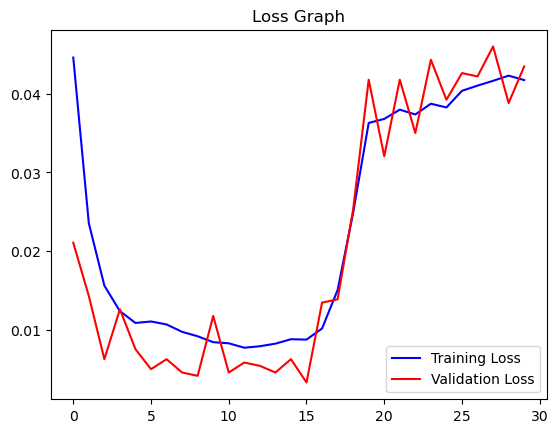

In [72]:
loss = history.history['age_out_accuracy']
val_loss = history.history['val_age_out_accuracy']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

## Prediction with Test data

Original Gender: Female Original Age:  3
1/1 [==============================] - 0s 110ms/step
Predicted Gender:  Female Predicted Age:  2


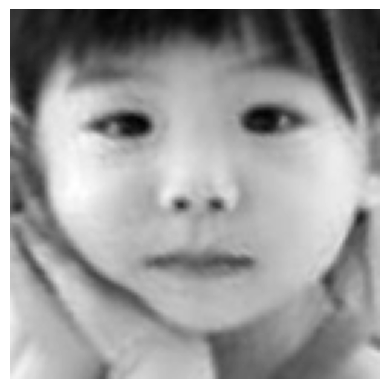

In [73]:
image_index = 100
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age: ", y_age[image_index])
#predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender: ", pred_gender, "Predicted Age: ", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128),cmap = 'gray')

Original Gender: Female Original Age:  26
1/1 [==============================] - 0s 21ms/step
Predicted Gender:  Female Predicted Age:  27


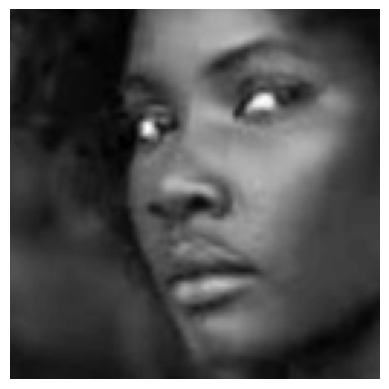

In [74]:
image_index = 3200
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age: ", y_age[image_index])
#predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender: ", pred_gender, "Predicted Age: ", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128),cmap = 'gray')

Original Gender: Male Original Age:  42
1/1 [==============================] - 0s 22ms/step
Predicted Gender:  Male Predicted Age:  40


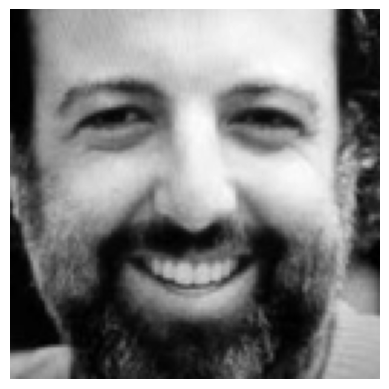

In [75]:
image_index = 10000
print("Original Gender:", gender_dict[y_gender[image_index]], "Original Age: ", y_age[image_index])
#predict from model
pred = model.predict(X[image_index].reshape(1, 128, 128, 1))
pred_gender = gender_dict[round(pred[0][0][0])]
pred_age = round(pred[1][0][0])
print("Predicted Gender: ", pred_gender, "Predicted Age: ", pred_age)
plt.axis('off')
plt.imshow(X[image_index].reshape(128,128),cmap = 'gray')